# Paired Sample T-test : 전후 차이 비교

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [20]:
from matplotlib import font_manager, rc

In [21]:
font_location = "C:/Windows/Fonts/NanumBarunGothic.ttf"

In [22]:
font_name = font_manager.FontProperties(fname=font_location).get_name()
print(font_name)

NanumBarunGothic


In [23]:
rc('font', family="NanumBarunGothic")

## 전후 차이 비교를 위한 샘플데이터(2018년 생생정보통, 수요미식회, 맛있는녀석들) 전처리

In [3]:
df1 = pd.read_csv('sangsang_2018_tidy.csv')
df2 = pd.read_csv('suyo_2018_2_tidy.csv')
df3 = pd.read_csv('mot_2018_2_tidy.csv')

In [4]:
df1.head()

,방송,식당,방영일,포스팅일,제목,days_diff,위치,서울
0,생생정보통,전주회관식당,2018-01-02,2018-01-02,전주 비빔밥 맛집 식당 ㅣ 가족회관,0,진안,0
1,생생정보통,전주회관식당,2018-01-02,2018-01-27,"[롯데몰 은평 맛집]전주중앙회관,비빔밥,윤식당 비빔밥,제육볶음 비빔밥,정식추천,세트...",25,진안,0
2,생생정보통,전주회관식당,2018-01-02,2018-01-02,생생정보 484회 더덕 흑돼지구이 진안군 전주회관식당 맛집 인력거 체험 달콤한 홍삼...,0,진안,0
3,생생정보통,전주회관식당,2018-01-02,2017-12-31,2017송년. 좋은사람들과 좋은만남. 아름다운 마무리. 전주역 앞. 맛집식당. 두...,-2,진안,0
4,생생정보통,전주회관식당,2018-01-02,2018-01-24,[전주한옥마을]종로회관,22,진안,0


In [5]:
df2.head()

,Unnamed: 0,방송,식당,방영일,포스팅일,제목,위치,서울,days_diff
0,0,수요미식회,말굽버섯,2018-01-31,2018-02-07,청계산 맛집 수요미식회 말굽 버섯 전골 다양한 버섯가득 말굽버섯,성남,0.0,7
1,1,수요미식회,말굽버섯,2018-01-31,2018-01-09,자연산 말굽버섯효능 및 먹는법[말굽버섯가격 안내],성남,0.0,-22
2,2,수요미식회,말굽버섯,2018-01-31,2018-02-05,말굽처럼 생겼다고 해서 붙여진 말굽버섯,성남,0.0,5
3,3,수요미식회,말굽버섯,2018-01-31,2018-01-23,말굽버섯,성남,0.0,-8
4,4,수요미식회,말굽버섯,2018-01-31,2018-02-08,"야생 말굽버섯파는곳, 말굽버섯효능, 말굽버섯가격",성남,0.0,8


In [6]:
df3.head()

,Unnamed: 0,방송,식당,방영일,포스팅일,제목,위치,서울,days_diff
0,0,맛있는 녀석들,가람떡갈비,2018-01-05,2017-12-25,[용산]떡갈비 맛집 ‘가람떡갈비’ 김치찌개 + 떡갈비의 환상의 조합,용산,1.0,-11
1,1,맛있는 녀석들,가람떡갈비,2018-01-05,2017-12-25,삽겹살과 낙지가 한 방에! 용산 맛집 가람 떡갈비 다녀왔어욤 :),용산,1.0,-11
2,2,맛있는 녀석들,가람떡갈비,2018-01-05,2018-01-01,용산역 맛집 가람떡갈비,용산,1.0,-4
3,3,맛있는 녀석들,가람떡갈비,2018-01-05,2018-01-05,용산 맛집 가람떡갈비 - 맛있는 녀석들 떡갈비,용산,1.0,0
4,4,맛있는 녀석들,가람떡갈비,2018-01-05,2018-01-10,용산역 맛집 가람떡갈비 대신 먹은 고추장불고기!!,용산,1.0,5


In [7]:
df2 = df2.drop(columns = ['Unnamed: 0'])
df3 = df3.drop(columns = ['Unnamed: 0'])

In [8]:
df = pd.concat([df1, df2, df3], ignore_index=True, sort = False)

In [41]:
df.to_csv('2018.csv', index=False)

In [9]:
df.head()

,방송,식당,방영일,포스팅일,제목,days_diff,위치,서울
0,생생정보통,전주회관식당,2018-01-02,2018-01-02,전주 비빔밥 맛집 식당 ㅣ 가족회관,0,진안,0.0
1,생생정보통,전주회관식당,2018-01-02,2018-01-27,"[롯데몰 은평 맛집]전주중앙회관,비빔밥,윤식당 비빔밥,제육볶음 비빔밥,정식추천,세트...",25,진안,0.0
2,생생정보통,전주회관식당,2018-01-02,2018-01-02,생생정보 484회 더덕 흑돼지구이 진안군 전주회관식당 맛집 인력거 체험 달콤한 홍삼...,0,진안,0.0
3,생생정보통,전주회관식당,2018-01-02,2017-12-31,2017송년. 좋은사람들과 좋은만남. 아름다운 마무리. 전주역 앞. 맛집식당. 두...,-2,진안,0.0
4,생생정보통,전주회관식당,2018-01-02,2018-01-24,[전주한옥마을]종로회관,22,진안,0.0


In [10]:
df['방영전'] = df['days_diff'] < 0
df['방영후'] = df['days_diff'] >= 0

In [11]:
df['방영전'] = df['방영전'].astype(int)
df['방영후'] = df['방영후'].astype(int)

In [12]:
df.head()

,방송,식당,방영일,포스팅일,제목,days_diff,위치,서울,방영전,방영후
0,생생정보통,전주회관식당,2018-01-02,2018-01-02,전주 비빔밥 맛집 식당 ㅣ 가족회관,0,진안,0.0,0,1
1,생생정보통,전주회관식당,2018-01-02,2018-01-27,"[롯데몰 은평 맛집]전주중앙회관,비빔밥,윤식당 비빔밥,제육볶음 비빔밥,정식추천,세트...",25,진안,0.0,0,1
2,생생정보통,전주회관식당,2018-01-02,2018-01-02,생생정보 484회 더덕 흑돼지구이 진안군 전주회관식당 맛집 인력거 체험 달콤한 홍삼...,0,진안,0.0,0,1
3,생생정보통,전주회관식당,2018-01-02,2017-12-31,2017송년. 좋은사람들과 좋은만남. 아름다운 마무리. 전주역 앞. 맛집식당. 두...,-2,진안,0.0,1,0
4,생생정보통,전주회관식당,2018-01-02,2018-01-24,[전주한옥마을]종로회관,22,진안,0.0,0,1


In [26]:
b4_after = pd.DataFrame(df.groupby('식당')['방영전', '방영후'].sum()).reset_index()

In [14]:
b4_after

,식당,방영전,방영후
0,3일한우국밥,29,66
1,가람떡갈비,13,56
2,가마솥 족발,160,151
3,가마솥손두부,30,49
4,강남 국미당,1,7
5,강남 대우부대찌개,36,21
6,강남 우정양곱창,6,33
7,강남 우텐더강남 삼정하누,2,22
8,갱생,411,435
9,고양 만포면옥,2,8


In [15]:
b4_after[['방영전','방영후']].describe()

,방영전,방영후
count,99.000000,99.000000
mean,78.777778,94.545455
std,124.852366,128.519059
min,0.000000,1.000000
25%,5.500000,20.000000
50%,18.000000,39.000000
75%,86.000000,101.000000
max,495.000000,536.000000


**평균값을 보았을 때, 방영전후 차이가 있음**

### outlier 확인

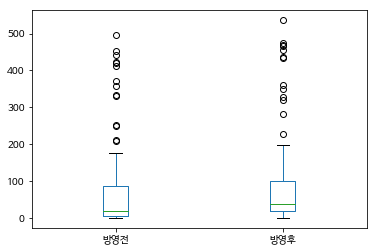

In [24]:
b4_after[['방영전', '방영후']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('boxplot_outliers.png')

200 이상 없애기

In [27]:
b4_after1 = b4_after[(b4_after['방영전']<200) & (b4_after['방영후']<200)]

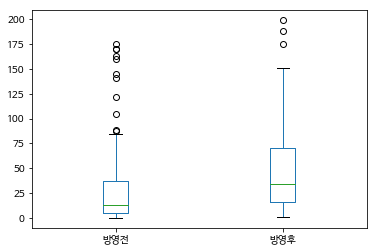

In [28]:
b4_after1[['방영전', '방영후']].plot(kind='box')

100 이상 없애기

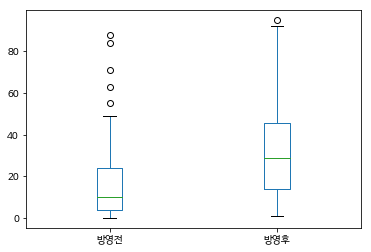

In [29]:
b4_after2 = b4_after[(b4_after['방영전']<100) & (b4_after['방영후']<100)]
b4_after2[['방영전', '방영후']].plot(kind='box')

### 정규성 검정

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


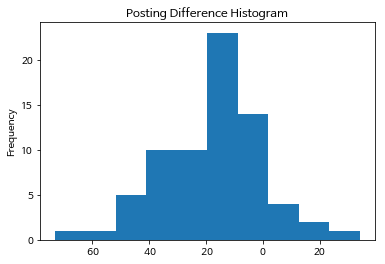

In [32]:
b4_after2['post_diff'] = b4_after2['방영전'] - b4_after2['방영후']

b4_after2['post_diff'].plot(kind='hist', title= '방영후 포스팅 차이')

Text(0.5,1,'Posting Difference Q-Q Plot')

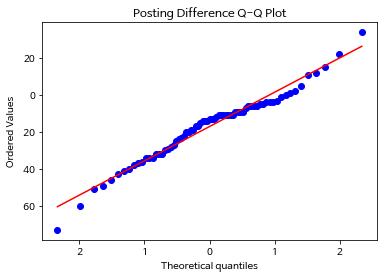

In [33]:
stats.probplot(b4_after2['post_diff'], plot= plt)
plt.title('Posting Difference Q-Q Plot')

In [34]:
stats.shapiro(b4_after2['post_diff'])

(0.9764832258224487, 0.20327332615852356)

**정규성 만족!!!!!!**

## Paired sample t-test

In [35]:
stats.ttest_rel(b4_after2['방영전'], b4_after2['방영후'])

Ttest_relResult(statistic=-7.752683381491662, pvalue=5.212087452788909e-11)

**pvalue < 0.05이므로 맛집 프로그램 방영전과 방영후 포스팅 차이가 있다고 말할 수 있음**